<a href="https://colab.research.google.com/github/prime1417/Analysis_Project_Ddareungi/blob/main/Ddareungi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석 주제
  - 서울시 공공자전거 '따릉이' 이용 현황 분석

분석 목표

- 따릉이 이용량 변화 패턴 파악, 특정 요일이나 시간대에 이용량이 급증하는 이유 분석
- 주요 대여소 위치 분석, 대여소 간 이동 패턴 시각화로 시민들의 주요 통행 경로 파악
- 날씨, 계절 같은 외부 요인이 이용량에 미치는 영향을 분석해 어떤 상황에 따릉이 수요가 늘어나는지 예측

활용 데이터

- 서울시 열린데이터광장, 따릉이 대여/반납 정보
- 기상청, 일일 기상 정보


# 따릉이 데이터 가져오기

In [ ]:
## 2024년 1월 일일 데이터 가져오기
from google.colab import files
uploaded = files.upload()

Saving tpss_bcycl_od_statnhm_20240101.csv to tpss_bcycl_od_statnhm_20240101.csv
Saving tpss_bcycl_od_statnhm_20240102.csv to tpss_bcycl_od_statnhm_20240102.csv
Saving tpss_bcycl_od_statnhm_20240103.csv to tpss_bcycl_od_statnhm_20240103.csv
Saving tpss_bcycl_od_statnhm_20240104.csv to tpss_bcycl_od_statnhm_20240104.csv
Saving tpss_bcycl_od_statnhm_20240105.csv to tpss_bcycl_od_statnhm_20240105.csv
Saving tpss_bcycl_od_statnhm_20240106.csv to tpss_bcycl_od_statnhm_20240106.csv
Saving tpss_bcycl_od_statnhm_20240107.csv to tpss_bcycl_od_statnhm_20240107.csv
Saving tpss_bcycl_od_statnhm_20240108.csv to tpss_bcycl_od_statnhm_20240108.csv
Saving tpss_bcycl_od_statnhm_20240109.csv to tpss_bcycl_od_statnhm_20240109.csv
Saving tpss_bcycl_od_statnhm_20240110.csv to tpss_bcycl_od_statnhm_20240110.csv
Saving tpss_bcycl_od_statnhm_20240111.csv to tpss_bcycl_od_statnhm_20240111.csv
Saving tpss_bcycl_od_statnhm_20240112.csv to tpss_bcycl_od_statnhm_20240112.csv
Saving tpss_bcycl_od_statnhm_20240113.cs

In [ ]:
import pandas as pd

ddareungi01 = pd.DataFrame()

for i in uploaded.keys() :
  try :
    df = pd.read_csv(i, encoding='EUC-KR')
    ddareungi01 = pd.concat([ddareungi01,df], axis=0)
  except UnicodeDecodeError:
    print(f"File {i} could not be decoded with CP949. Trying a different encoding...")
    try:
      df = pd.read_csv(i, encoding='utf-8')
      ddareungi01 = pd.concat([ddareungi01,df], axis=0)
    except UnicodeDecodeError as e:
       print(f"Error decoding file {i}: {e}")



# ddareungi01.to_csv('ddareungi01.csv', index=False)

In [5]:
import pandas as pd
ddareungi01 = pd.read_csv('ddareungi01.csv', parse_dates=['기준_날짜'])

ddareungi01.info()
ddareungi01.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3954623 entries, 0 to 3954622
Data columns (total 10 columns):
 #   Column     Dtype         
---  ------     -----         
 0   기준_날짜      datetime64[ns]
 1   집계_기준      object        
 2   기준_시간대     int64         
 3   시작_대여소_ID  object        
 4   시작_대여소명    object        
 5   종료_대여소_ID  object        
 6   종료_대여소명    object        
 7   전체_건수      int64         
 8   전체_이용_분    int64         
 9   전체_이용_거리   int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 301.7+ MB


,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리
0,2024-01-01,출발시간,0,ST-1055,강일동_001_1,ST-504,강일동_002_6,1,4,700
1,2024-01-01,출발시간,0,ST-1093,중화2동_035_1,ST-3168,중화2동_009_1,1,5,848
2,2024-01-01,출발시간,0,ST-1216,보문동_006_1,ST-1814,창신3동_011_1,1,29,1510
3,2024-01-01,출발시간,0,ST-1295,창1동_048_1,ST-2107,창5동_026_1,1,5,1260
4,2024-01-01,출발시간,5,ST-1454,보문동_014_1,ST-1215,안암동_023_1,1,12,880


## 2024년 1월 따릉이 데이터 통계분석

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267648 entries, 0 to 1267647
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   기준_날짜    1267648 non-null  datetime64[ns]
 1   시작_대여소명  1267648 non-null  object        
 2   종료_대여소명  1267648 non-null  object        
 3   전체_건수    1267648 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 38.7+ MB


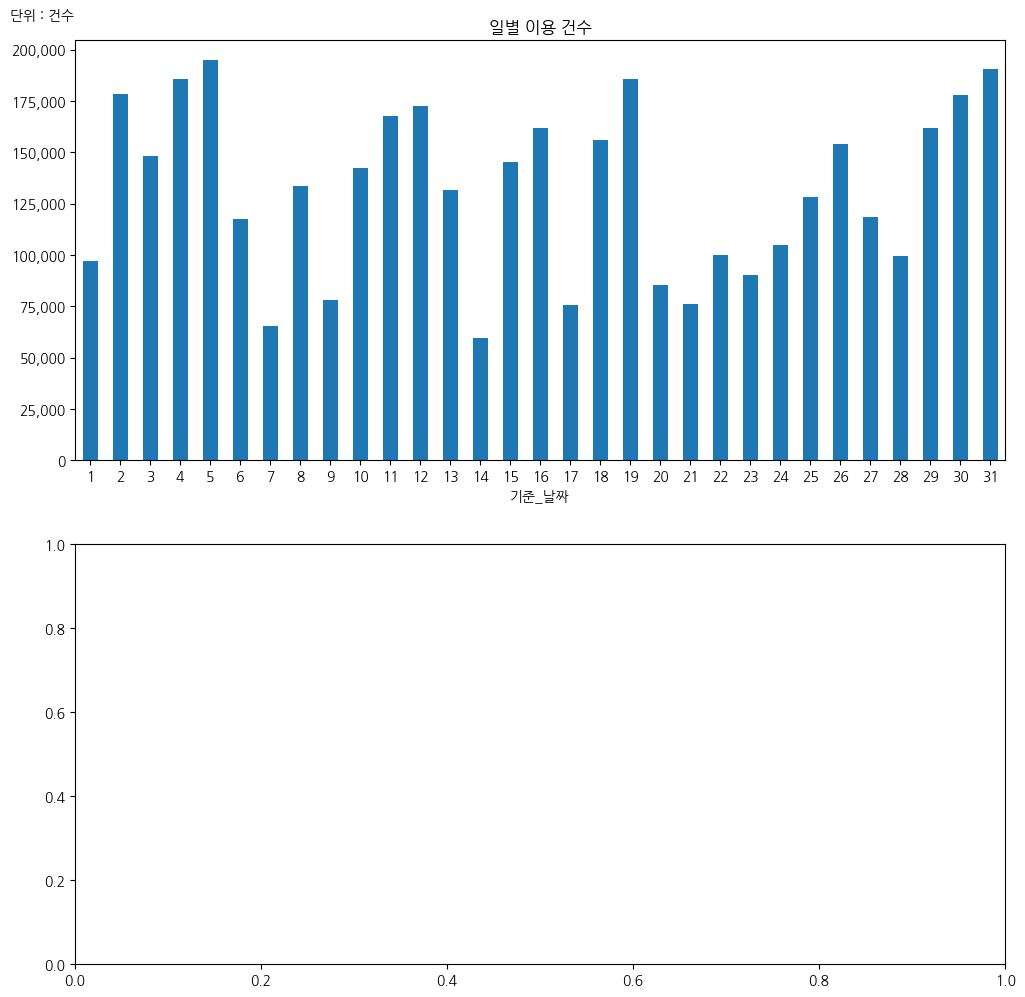

In [ ]:
import datetime  as dt
#날짜 데이터의 data type 변환
ddareungi01['기준_날짜'] = pd.to_datetime(ddareungi01['기준_날짜'], format='%Y%m%d')
ddareungi01['기준_날짜'] # 변환 확인

import matplotlib.pyplot as plt
# 일별 따릉이 이용 건수
day_number_of_uses = ddareungi01.groupby(['기준_날짜'])['전체_건수'].sum()

## 일별 이용 건수 시각화(그래프)
fig, ax = plt.subplots(2, 1,figsize=(12, 12))
day_number_of_uses.plot(kind='bar', ax=ax[0], title='일별 이용 건수')

#x범례 표시를 '기준_날짜'컬럼의 day로 표기하고, 정방향으로 돌리기
xlabel = ddareungi01['기준_날짜'].dt.day.drop_duplicates()
ax[0].set_xticklabels(xlabel, rotation=0)

#y축 범례(건수)에 자릿수 표기(,) 넣기
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
##y축 범례 단위 '건' 표기 넣고, 위치를 y축 밖 상단 중앙에 놓기
ax[0].text(-0.07, 1.05, '단위 : 건수', rotation=0, transform=ax[0].transAxes)


# 일별 대여시작-대여종료 ID 별 이용 건수
day_place_uses = ddareungi01.groupby(['기준_날짜','시작_대여소명','종료_대여소명'], as_index=False)['전체_건수'].sum()
day_place_uses.query('전체_건수.max()')
day_place_uses.info()


# 날씨 데이터 가져오기

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 강수량.csv to 강수량.csv
Saving 기온.csv to 기온.csv
Saving 습도.csv to 습도.csv
Saving 풍속.csv to 풍속.csv


In [ ]:
import pandas as pd

weather_precipitation = pd.read_csv('강수량.csv', encoding='EUC-KR', header=6, parse_dates=['날짜'])
weather_precipitation.rename(columns={'날짜':'일시', '지점':'지점번호'}, inplace=True)
weather_precipitation.info()
weather_precipitation.head()

weather_temper = pd.read_csv('기온.csv', encoding='EUC-KR', header=7, usecols=range(2,10,1), parse_dates=['일시'])
weather_temper.info()
weather_temper.head()


weather_humidity = pd.read_csv('습도.csv', encoding='EUC-KR', header=7, usecols=range(2,7,1), parse_dates=['일시'])
weather_humidity.info()
weather_humidity.head()

weather_wind = pd.read_csv('풍속.csv', encoding='EUC-KR', header=7, usecols=range(2,12,1), parse_dates=['일시'])
weather_wind.info()
weather_wind.head()

li = [weather_temper, weather_humidity, weather_wind]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   일시       366 non-null    datetime64[ns]
 1   지점번호     366 non-null    int64         
 2   강수량(mm)  160 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지점번호     366 non-null    int64         
 1   지점명      366 non-null    object        
 2   일시       366 non-null    datetime64[ns]
 3   평균기온(℃)  366 non-null    float64       
 4   최고기온(℃)  366 non-null    float64       
 5   최고기온시각   366 non-null    object        
 6   최저기온(℃)  366 non-null    float64       
 7   최저기온시각   366 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1),

In [ ]:
weather = pd.merge(weather_temper, weather_humidity, on=['지점번호', '지점명', '일시'], how='inner')
weather = pd.merge(weather, weather_wind, on=['지점번호', '지점명', '일시'], how='inner')
weather = pd.merge(weather, weather_precipitation, on=['일시','지점번호'], how='inner')
weather.info()
weather.head()
## 결측치 확인
weather.isna().any(axis=1)
weather[weather.isna().any(axis=1)]

## 강수량의 결측치는 0으로 채우기
weather['강수량(mm)'].fillna(0, inplace=True)
weather.isna().any(axis=1)
weather[weather.isna().any(axis=1)]

weather.to_csv('weather.csv', encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   지점번호           366 non-null    int64         
 1   지점명            366 non-null    object        
 2   일시             366 non-null    datetime64[ns]
 3   평균기온(℃)        366 non-null    float64       
 4   최고기온(℃)        366 non-null    float64       
 5   최고기온시각         366 non-null    object        
 6   최저기온(℃)        366 non-null    float64       
 7   최저기온시각         366 non-null    object        
 8   평균습도(%rh)      366 non-null    float64       
 9   최저습도(%rh)      366 non-null    int64         
 10  평균풍속(m/s)      363 non-null    float64       
 11  최대풍속(m/s)      364 non-null    float64       
 12  최대풍속풍향(deg)    364 non-null    float64       
 13  최대풍속시각         364 non-null    object        
 14  최대순간풍속(m/s)    364 non-null    float64       
 15  최대순간풍속풍향(deg)  364 non-

/tmp/ipython-input-1993371323.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather['강수량(mm)'].fillna(0, inplace=True)


## 2024년 1월 일별 강수량 통계분석

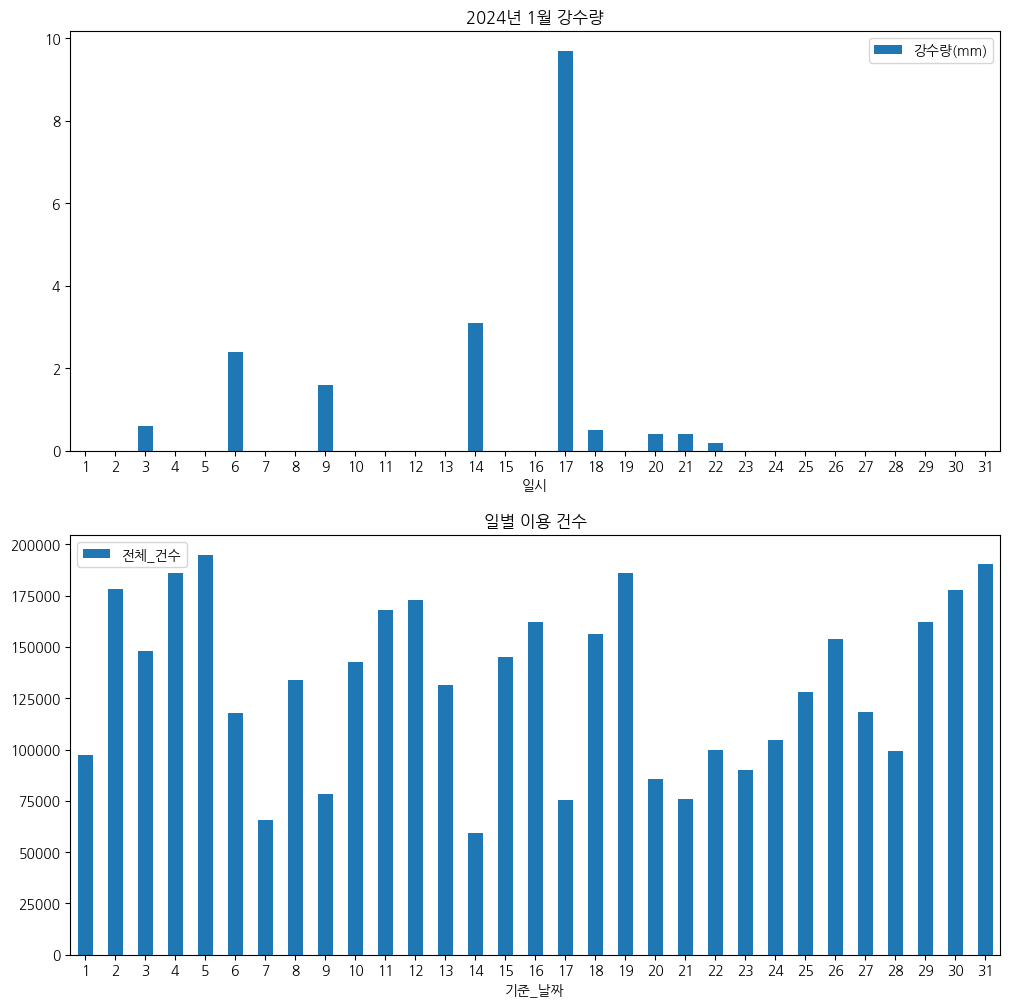

In [ ]:
## 2024년 1월 강수량 데이터
weather_pre_01 = weather[['일시','강수량(mm)']].query('일시 >= "2024-01-01" and 일시 < "2024-02-01"')

## 일별 강수량 시각화
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
weather_pre_01.plot(x='일시', y='강수량(mm)', kind='bar', ax=ax[0], title='2024년 1월 강수량')
xlabel = weather_pre_01['일시'].dt.day.drop_duplicates()
ax[0].set_xticklabels(xlabel, rotation=0)

# 일별 따릉이 이용 건수
day_number_of_uses = ddareungi01.groupby(['기준_날짜'], as_index=False)['전체_건수'].sum()
day_number_of_uses.plot(x='기준_날짜' ,y='전체_건수' ,kind='bar', ax=ax[1], title='일별 이용 건수')
xlabel = ddareungi01['기준_날짜'].dt.day.drop_duplicates()
ax[1].set_xticklabels(xlabel, rotation=0)
plt.show()

# 2024년 1월 날씨와 따릉이 데이터 결합

In [19]:
# 2024년 1월 일별 날씨 데이터
weather = pd.read_csv('weather.csv', parse_dates=['일시'])
weather_01 = weather.query('일시 >= "2024-01-01" and 일시 < "2024-02-01"')

# 2024년 1월 일별 총 이용 건수
use_ddareungi01 = ddareungi01.groupby(['기준_날짜'], as_index=False)['전체_건수'].sum()
use_ddareungi01.rename(columns={'기준_날짜':'일시'}, inplace=True)


# 날씨와 따릉이 데이터
total_data = pd.merge(use_ddareungi01, weather_01, on='일시', how='inner')
total_data.rename(columns={'전체_건수':'따릉이사용횟수'}, inplace=True)
total_data.info()
total_data.head()

total_data.to_csv('total_data.csv', encoding='utf-8', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   일시             31 non-null     datetime64[ns]
 1   따릉이사용횟수        31 non-null     int64         
 2   지점번호           31 non-null     int64         
 3   지점명            31 non-null     object        
 4   평균기온(℃)        31 non-null     float64       
 5   최고기온(℃)        31 non-null     float64       
 6   최고기온시각         31 non-null     object        
 7   최저기온(℃)        31 non-null     float64       
 8   최저기온시각         31 non-null     object        
 9   평균습도(%rh)      31 non-null     float64       
 10  최저습도(%rh)      31 non-null     int64         
 11  평균풍속(m/s)      31 non-null     float64       
 12  최대풍속(m/s)      31 non-null     float64       
 13  최대풍속풍향(deg)    31 non-null     float64       
 14  최대풍속시각         31 non-null     object        
 15  최대순간풍속(m/s)    31 non-nul

## 2024년 1월 total_data 분석

### 요일별 따릉이사용횟수 분석

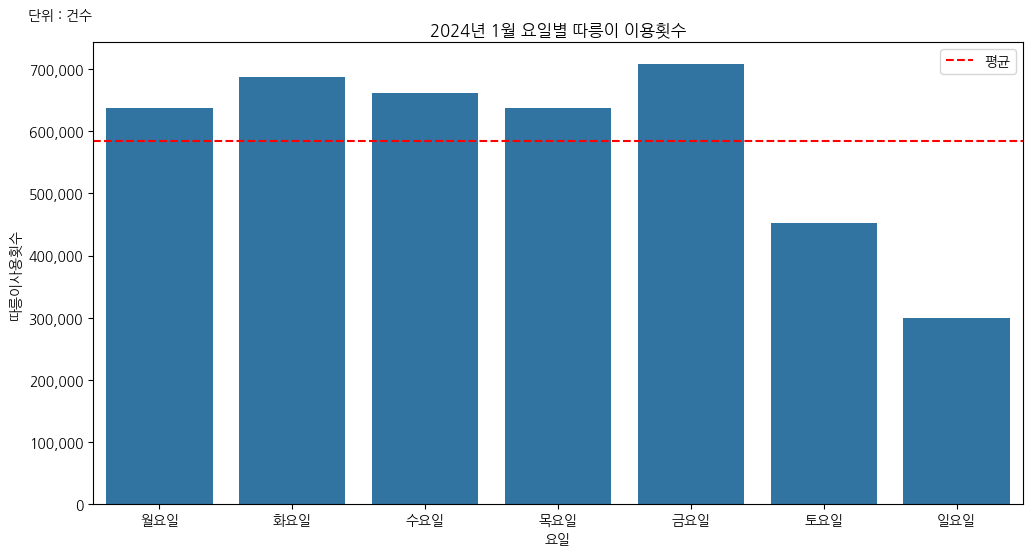

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


total_data = pd.read_csv('total_data.csv', parse_dates=['일시'])

# 날짜별(요일별) 따릉이 이용횟수 확인하기
# 요일 컬럼 추가
total_data['요일'] = total_data['일시'].dt.dayofweek
# 요일별 이용건수 그룹화
dayofweek_use = total_data.groupby(['요일'], as_index=False)['따릉이사용횟수'].sum()
# 숫자로된 요일을 str 변환하기 위한 dict 생성
day_map = {
    0: '월요일',
    1: '화요일',
    2: '수요일',
    3: '목요일',
    4: '금요일',
    5: '토요일',
    6: '일요일'
}
# map() 메서드를 활용한 요일(숫자 코드) => 요일(str) 변환
dayofweek_use['요일'] = dayofweek_use['요일'].map(day_map)

# 요일별 따릉이 이용횟수 시각화
plt.figure(figsize=(12, 6))
ax=sns.barplot(x='요일', y='따릉이사용횟수', data=dayofweek_use)
plt.title('2024년 1월 요일별 따릉이 이용횟수')
# y축 범례 자릿수 표기(,)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
# y축 범례 단위 '건' 표기 넣고, 위치를 y축 밖 상단 중앙에 놓기
ax.text(-0.07, 1.05, '단위 : 건수', rotation=0, transform=ax.transAxes)
# 이용자 수 평균 그리기
ax.axhline(y=dayofweek_use['따릉이사용횟수'].mean(), color='r', linestyle='--', label='평균')
ax.legend()


#### 해석

In [ ]:
# 결론 : 주말 이용자 수는 평일 이용자 수는 물론 평균 이용자 수보다 적다
# 해석 : 평일은 출퇴근 용도 사용이 많을 것이다.

### 기상요소별 따릉이사용횟수 분석

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


total_data = pd.read_csv('total_data.csv', parse_dates=['일시'])

In [11]:
total_data

,일시,따릉이사용횟수,지점번호,지점명,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각,평균습도(%rh),최저습도(%rh),평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg),최대풍속시각,최대순간풍속(m/s),최대순간풍속풍향(deg),최대순간풍속시각,강수량(mm)
0,2024-01-01,97200,108,서울,3.3,7.3,12:55,-0.3,4:02,83.4,65,1.7,3.2,180.0,15:25,4.5,180.0,15:18,0.0
1,2024-01-02,178406,108,서울,2.9,4.3,14:09,2.2,6:22,72.6,59,1.6,3.1,270.0,14:09,5.3,250.0,14:07,0.0
2,2024-01-03,148106,108,서울,1.8,4.0,13:20,-1.1,23:50,80.4,72,1.6,4.2,320.0,14:35,7.6,320.0,14:33,0.6
3,2024-01-04,185758,108,서울,1.4,4.7,15:56,-3.3,7:15,74.3,64,1.9,3.4,50.0,11:05,6.1,180.0,17:52,0.0
4,2024-01-05,194836,108,서울,5.0,9.1,14:39,1.4,23:56,77.1,59,2.3,4.8,250.0,12:53,10.3,180.0,14:23,0.0
5,2024-01-06,117688,108,서울,0.7,5.2,14:44,-2.7,8:19,63.9,34,2.2,4.0,250.0,15:04,7.7,320.0,18:22,2.4
6,2024-01-07,65446,108,서울,-4.4,-0.9,0:01,-8.3,23:12,57.4,34,3.1,6.9,290.0,13:10,11.7,290.0,12:56,0.0
7,2024-01-08,133836,108,서울,-4.7,0.0,14:41,-10.3,6:19,57.8,29,1.8,4.0,320.0,1:07,5.7,340.0,0:58,0.0
8,2024-01-09,78224,108,서울,-0.6,0.4,22:39,-1.9,0:01,84.0,62,2.0,3.0,50.0,9:37,4.6,50.0,5:48,1.6
9,2024-01-10,142594,108,서울,-1.0,3.3,15:42,-4.1,6:32,85.9,69,1.7,3.0,290.0,13:22,4.7,290.0,13:28,0.0


#Seaborn 깨짐 방지

In [25]:
# -----------------------------------------------------
# 1. 나눔 폰트 설치 (Colab 환경에 따라 시간이 좀 걸릴 수 있습니다.)
# -----------------------------------------------------
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv # 폰트 캐시 갱신
!rm ~/.cache/matplotlib -rf # Matplotlib 캐시 삭제 (필수)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,746 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126371 files and dire

폰트 설정 완료! 이제 한글이 제대로 표시될 것입니다.


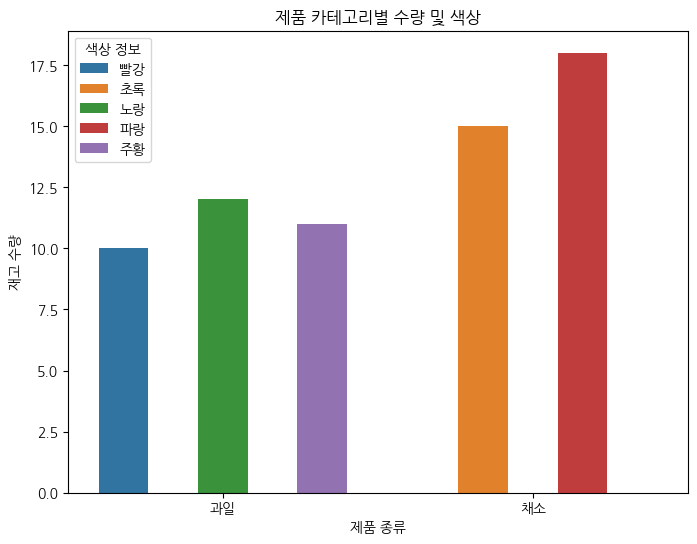

In [1]:

# -----------------------------------------------------
# 2. 런타임 다시 시작 (매우 중요!)
# -----------------------------------------------------
# 위에 폰트 설치 코드를 실행한 후, 반드시 런타임을 다시 시작해야 합니다.
# 런타임 > 런타임 다시 시작 (Ctrl + M)

# -----------------------------------------------------
# 3. Matplotlib 폰트 설정 (런타임 재시작 후 이 셀부터 다시 실행)
# -----------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 나눔고딕 폰트 설정
plt.rc('font', family='NanumGothic')

# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

print("폰트 설정 완료! 이제 한글이 제대로 표시될 것입니다.")

# -----------------------------------------------------
# 4. 예시 데이터 및 그래프 (한글 확인)
# -----------------------------------------------------
data = {
    '카테고리': ['과일', '채소', '과일', '채소', '과일'],
    '수량': [10, 15, 12, 18, 11],
    '색상': ['빨강', '초록', '노랑', '파랑', '주황']
}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.barplot(x='카테고리', y='수량', hue='색상', data=df)
plt.title('제품 카테고리별 수량 및 색상')
plt.xlabel('제품 종류')
plt.ylabel('재고 수량')
plt.legend(title='색상 정보')
plt.show()